In [7]:
import numpy as np
from mobile_sam.predictor_trt import PredictorTRT

In [2]:
predictor = PredictorTRT(
    image_encoder_engine="../data/mobile_sam_image_encoder_cnn.engine",
    mask_decoder_engine="../data/mobile_sam_mask_decoder.engine"
)

In [3]:
import PIL.Image

In [4]:
image = PIL.Image.open("../assets/dog.jpg")

In [5]:
predictor.set_image(image)

/workspace/mobile_sam/predictor_trt.py:69: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:199.)
  image_torch_resized = torch.from_numpy(image_np_resized).permute(2, 0, 1)


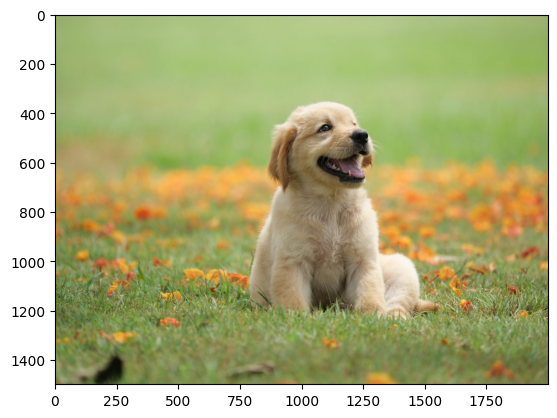

In [15]:
plt.imshow(image)

In [25]:
box = [750, 370, 1590, 1220]
points = np.array([
    [box[0], box[1]],
    [box[2], box[3]]
])
point_labels = np.array([2, 3])

iou_preds, low_res_masks = predictor.predict(
    points=points,
    point_labels=point_labels
)

In [28]:
import torch.nn.functional as F

In [ ]:
def upscale_mask(mask, image_shape, size=256):
    
    if image_shape[1] > image_shape[0]:
        lim_x = size
        lim_y = int(size * image_shape[0] / image_shape[1])
    else:
        lim_x = int(size * image_shape[0] / image_shape[1])
        lim_y = size

    mask[:, :, :lim_y, :lim_x]
    mask = F.interpolate(mask[:, :, :lim_y, :lim_x], image_shape, mode='bilinear')
    
    return mask

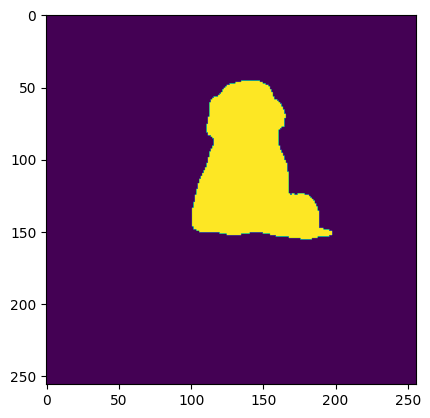

In [27]:
import matplotlib.pyplot as plt


plt.imshow(low_res_masks[0, 3].detach().cpu() > 0)